
# Leaky modes for Solid Core Step index fiber with Cladding that terminates 

In Marcuse's second (later) book, he mentions effects of terminating cladding are minimal.  Here we investigate.

In [1]:
import numpy as np

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf, plotlogf_real
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton


importing NGSolve-6.2.2203-56-g47f483033


In [2]:
n_core = 1.6
n_clad = 1.5
n_air = 1

In [3]:
A = BraggExact(ts=[1e-6,2e-6, 2e-6], mats=['core', 'clad', 'air'], 
               ns=[lambda x:n_core, lambda x: n_clad, lambda x:n_air],
              maxhs=[.1,.05, .1], wl=1.8e-6, scale=1e-6)


In [4]:
Draw(CF([n for n in A.ns]), A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

# Now we set up to look for leaky modes

In [54]:
k_low = A.k0 * A.ns[2] * A.scale
k_mid = A.k0 * A.ns[1] * A.scale
k_high = A.k0 * A.ns[0] * A.scale
outer = 'h2'
nu = 1

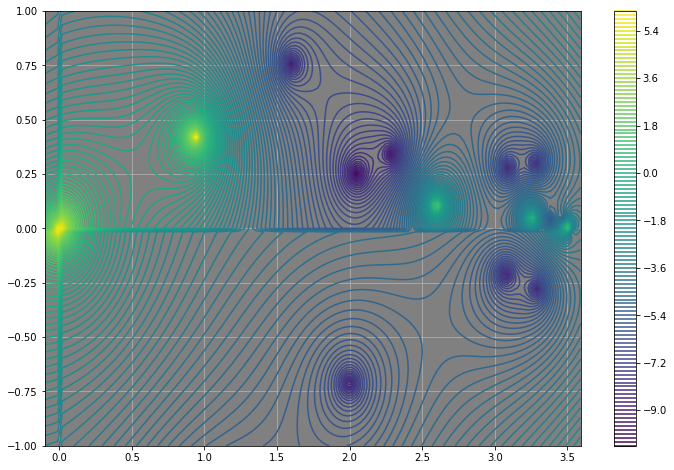

In [55]:
%matplotlib inline
plotlogf(A.determinant, -.1, k_low + .1, -1, 1, nu, outer,
         iref=125, rref=125, levels=125)

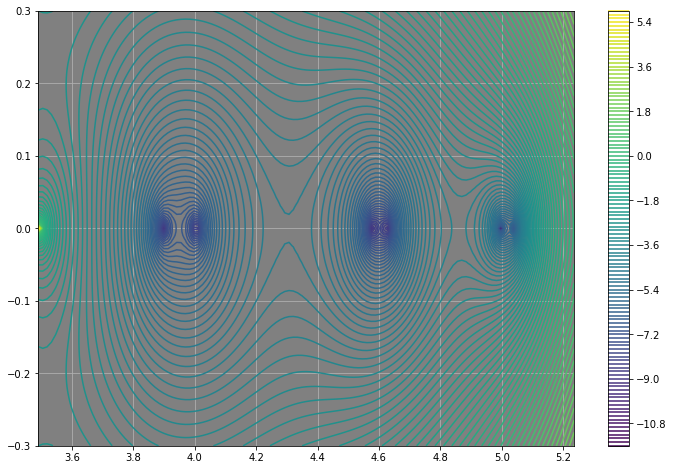

In [48]:
%matplotlib inline
plotlogf(A.determinant, k_low-.0001, k_mid+.0001, -.3,.3, nu, outer,
         iref=125, rref=125, levels=125)

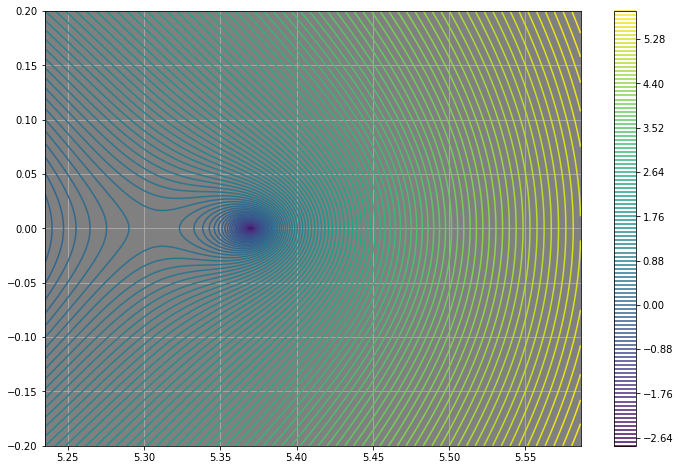

In [49]:
%matplotlib inline
plotlogf(A.determinant, k_mid-.001, k_high+.001, -.2,.2, nu, outer,
         iref=125, rref=125, levels=125)

In [62]:
guess = np.array(5.37)

beta1 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-10)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer)))


Scaled beta:  (5.368576474104927-5.464200458698205e-14j) . Residual of determinant:  1.1935901050140941e-14


# Bragg Exact Fields

In [63]:
Fs = A.all_fields(beta1, nu, outer)

In [64]:
Draw(Fs['Ez'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [65]:
Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':100})


WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

# Now look at same without termination of cladding

In [9]:
A = BraggExact(ts=[1e-6,2e-6], mats=['core', 'clad'], 
               ns=[lambda x:n_core, lambda x: n_clad],
              maxhs=[.1,.05], wl=1.8e-6, scale=1e-6)


In [10]:
Draw(CF([n for n in A.ns]), A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

# Now we set up to look for leaky modes

In [11]:
k_low = A.k0 * A.ns[1] * A.scale
k_high = A.k0 * A.ns[0] * A.scale
outer = 'h2'
nu = 3

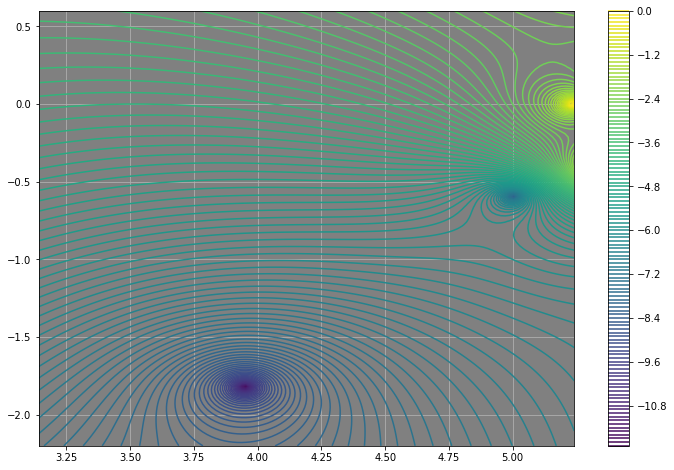

In [12]:
%matplotlib inline
plotlogf(A.determinant, .6*k_low, 1.001*k_low, -2.2,.6, nu, outer,
         iref=125, rref=125, levels=125)

In [13]:
guess = np.array(3.24)

beta1 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-10)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer)))


Scaled beta:  (3.9496994406726604-1.8204931949048233j) . Residual of determinant:  5.521304594847327e-18


# Bragg Exact Fields

In [51]:
Fs = A.all_fields(beta1, nu, outer)

In [52]:
Draw(Fs['Ez'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [34]:
Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':100})


WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene